
#  Statistique bivariée & tests statistiques  
Analyse de la relation entre deux variables + introduction aux tests statistiques  
_(Dataset : `ecommerce_dataset.csv`)_

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

try:
    import seaborn as sns
    sns.set(style="whitegrid")
except ImportError:
    sns = None

df = pd.read_csv("ecommerce_dataset.csv")
df.head()


,client_id,sexe,âge,revenu_mensuel,segment_age,revenu_cat,produit,canal_achat,montant_panier,panier_frequent,note_satisfaction,retour_produit,date_achat
0,1,Homme,50,3893.70,Mature,Moyen,Sport,Mobile,83.27,Non,2,Non,2023-05-28
1,2,Femme,39,2885.15,Adulte,Moyen,Électronique,Mobile,47.18,Oui,3,Non,2023-01-13
2,3,Homme,44,2369.53,Mature,Moyen,Sport,Mobile,72.28,Oui,4,Non,2023-03-13
3,4,Homme,38,3197.92,Adulte,Moyen,Électronique,Mobile,54.59,Non,3,Non,2023-05-07
4,5,Homme,20,3774.66,Jeune,Moyen,Sport,Mobile,75.30,Non,4,Non,2023-07-04



## Introduction aux tests statistiques

###  Pourquoi faire un test statistique ?

Un test statistique permet de répondre à des questions du type :

- *Les moyennes de deux groupes sont-elles vraiment différentes ?*
- *Cette corrélation est-elle significativement différente de 0 ?*
- *Deux variables qualitatives sont-elles indépendantes ?*

Comme on travaille sur un **échantillon**, on ne peut pas être sûr à 100 %.  
Un test statistique permet de décider si l'effet observé est **compatible avec le hasard** ou non.



### 0.2 Hypothèses H0 et H1

Pour chaque test, on pose :

- **H0 (hypothèse nulle)** : "rien ne se passe", aucune différence, aucune relation.
- **H1 (hypothèse alternative)** : il y a une différence, une relation, un effet.

Exemples :

- t-test :  
  - H0 : les deux moyennes sont égales  
  - H1 : les moyennes sont différentes  

- Chi² :  
  - H0 : les deux variables qualitatives sont indépendantes  
  - H1 : elles sont associées  



###  p-valeur et seuil de décision

La **p-valeur** est la probabilité d’obtenir un résultat **au moins aussi extrême** que celui observé,  
en **supposant H0 vraie**.

Règle pratique la plus courante :

- si `p-valeur < 0.05` → on **rejette H0** (effet significatif au seuil de 5 %)  
- si `p-valeur ≥ 0.05` → on **ne rejette pas H0** (pas assez de preuves pour conclure)



###  Tests paramétriques vs non paramétriques

- **Paramétriques** : reposent sur des hypothèses fortes (normalité, variances homogènes)  
  → t-test, ANOVA, corrélation de Pearson…

- **Non paramétriques** : reposent sur les rangs ou les ordres  
  → Mann–Whitney, Wilcoxon, Kruskal–Wallis, Spearman, Kendall…

Avant de choisir un test, on vérifie donc :

1. **Type de variables** (quanti / quali)  
2. **Nombre de groupes** (2 ou plus)  
3. **Normalité approximative** (Shapiro, histogrammes)  
4. **Homogénéité des variances** (Levene)  
5. **Taille d’échantillon** (petit / grand)



## Tableau récapitulatif des tests bivariés

| Type de relation | Exemple (dataset) | Graphiques | Tests paramétriques | Tests non paramétriques | Tests quali |
|------------------|-------------------|-----------|----------------------|-------------------------|------------|
| QUANTI ↔ QUANTI | `revenu_mensuel` ↔ `montant_panier` | scatter plot | Corrélation de Pearson | Spearman, Kendall | — |
| QUALI ↔ QUANTI (2 groupes) | `sexe` → `montant_panier` | boxplot, violin, barplot | t-test indépendant | Mann–Whitney | — |
| QUALI ↔ QUANTI (3+ groupes) | `segment_age` → `montant_panier` | boxplot, barplot | ANOVA | Kruskal–Wallis | — |
| QUALI ↔ QUALI | `sexe` ↔ `retour_produit` | countplot, heatmap | — | — | Chi², Fisher, V de Cramér |



# QUANTI ↔ QUANTI  
**Exemple : `revenu_mensuel` ↔ `montant_panier`**



##Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | `revenu_mensuel` (X), `montant_panier` (Y) |
| Graphique | Scatter plot (nuage de points) |
| Indicateurs | Covariance, corrélation de Pearson, Spearman, Kendall |
| Hypothèses (Pearson) | relation linéaire, normalité approximative, peu d’outliers extrêmes |
| Hypothèses (Spearman / Kendall) | relation monotone (Spearman), mesure de la concordance des rangs (Kendall) |


In [2]:

x = df["revenu_mensuel"]
y = df["montant_panier"]

cov_xy = np.cov(x, y, ddof=1)[0, 1]

pearson_r, pearson_p = stats.pearsonr(x, y)
spearman_r, spearman_p = stats.spearmanr(x, y)
kendall_tau, kendall_p = stats.kendalltau(x, y)

print("Covariance :", cov_xy)
print(f"Corrélation de Pearson : r = {pearson_r:.3f}, p = {pearson_p:.3e}")
print(f"Corrélation de Spearman : ρ = {spearman_r:.3f}, p = {spearman_p:.3e}")
print(f"Corrélation de Kendall : τ = {kendall_tau:.3f}, p = {kendall_p:.3e}")


Covariance : 7974.862474043824
Corrélation de Pearson : r = 0.139, p = 8.627e-66
Corrélation de Spearman : ρ = 0.209, p = 3.977e-147
Corrélation de Kendall : τ = 0.143, p = 5.134e-151


In [1]:

plt.figure()
if sns is not None:
    sns.scatterplot(x=x, y=y, alpha=0.6)
else:
    plt.scatter(x, y, alpha=0.6)
plt.xlabel("Revenu mensuel")
plt.ylabel("Montant du panier")
plt.title("Revenu mensuel vs Montant du panier")
plt.show()


NameError: name 'plt' is not defined


### 1.2 Interprétation rapide

- Signe de la corrélation → sens de la relation (positive / négative)  
- Valeur absolue → force de la relation (faible / modérée / forte)  
- p-valeur → significativité statistique  

Toujours conclure en français clair, dans le contexte métier.



# QUALI ↔ QUANTI  

On étudie comment une variable **qualitative** influence une variable **quantitative**.



## Tableau synthétique global

| Cas | Exemple | Graphiques | Test paramétrique | Test non paramétrique |
|-----|---------|-----------|-------------------|-----------------------|
| 2 modalités | `sexe` → `montant_panier` | boxplot, violin, barplot | t-test indépendant | Mann–Whitney |
| 3+ modalités | `segment_age` → `montant_panier` | boxplot, barplot | ANOVA | Kruskal–Wallis |



## Cas 2.a — 2 modalités (`sexe` → `montant_panier`)

Question :  
> Les hommes et les femmes dépensent-ils la même chose en moyenne ?



### 2.2.1 Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | `sexe` (H/F), `montant_panier` |
| Graphiques | boxplot, violin plot, barplot des moyennes |
| Test paramétrique | t-test indépendant (Welch) |
| Test non paramétrique | Mann–Whitney |
| Hypothèses t-test | normalité approximative par groupe, variances pas trop différentes, indépendance |
| Hypothèses Mann–Whitney | distributions pouvant être non normales, comparaison des niveaux entre deux groupes |


In [2]:

var_quali = "sexe"
var_quanti = "montant_panier"

df[[var_quali, var_quanti]].groupby(var_quali).describe().T


NameError: name 'df' is not defined

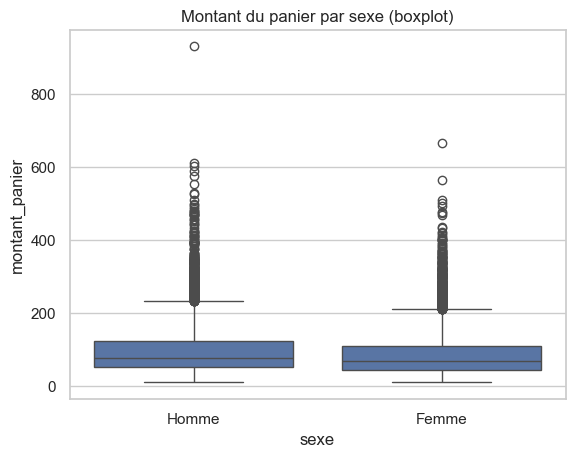

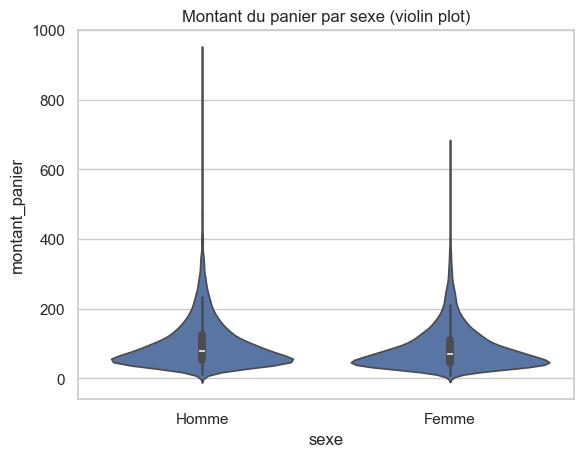

In [5]:

plt.figure()
if sns is not None:
    sns.boxplot(x=var_quali, y=var_quanti, data=df)
else:
    groups = [g[var_quanti].values for _, g in df.groupby(var_quali)]
    labels = df[var_quali].unique()
    plt.boxplot(groups, labels=labels)
plt.title("Montant du panier par sexe (boxplot)")
plt.show()

if sns is not None:
    plt.figure()
    sns.violinplot(x=var_quali, y=var_quanti, data=df)
    plt.title("Montant du panier par sexe (violin plot)")
    plt.show()



###  Vérification des hypothèses (normalité, variances)


In [6]:

from scipy.stats import shapiro, levene, mannwhitneyu

groupes = [g[var_quanti].dropna().values for _, g in df.groupby(var_quali)]
labels = df[var_quali].unique()

for label, g in df.groupby(var_quali):
    vals = g[var_quanti].dropna()
    stat, p = shapiro(vals.sample(min(len(vals), 500), random_state=42))
    print(f"Shapiro pour {label} : stat={stat:.3f}, p={p:.3f}, n={len(vals)}")

g1, g2 = groupes
stat_lev, p_lev = levene(g1, g2)
print(f"\nTest de Levene (égalité des variances) : stat={stat_lev:.3f}, p={p_lev:.3f}")


Shapiro pour Femme : stat=0.797, p=0.000, n=7479
Shapiro pour Homme : stat=0.721, p=0.000, n=7521

Test de Levene (égalité des variances) : stat=31.399, p=0.000



###  t-test indépendant & Mann–Whitney


In [8]:

t_stat, t_p = stats.ttest_ind(g1, g2, equal_var=True)  # Student
print("t-test indépendant ")
print(f"t = {t_stat:.3f}, p = {t_p:.3e}\n")


t_stat, t_p = stats.ttest_ind(g1, g2, equal_var=False)  # Welch
print("t-test indépendant (Welch)")
print(f"t = {t_stat:.3f}, p = {t_p:.3e}\n")

mw_stat, mw_p = mannwhitneyu(g1, g2, alternative="two-sided")
print("Test de Mann–Whitney")
print(f"U = {mw_stat:.3f}, p = {mw_p:.3e}")


t-test indépendant 
t = -9.933, p = 3.536e-23

t-test indépendant (Welch)
t = -9.936, p = 3.431e-23

Test de Mann–Whitney
U = 25182676.500, p = 1.326e-28



###  Conclusion

1. Regarder la normalité (Shapiro + graphes)  
2. Regarder les variances (Levene)  
3. Utiliser t-test (Welch) si c’est acceptable, sinon Mann–Whitney  
4. Conclure en français simple sur :  
   - l’existence ou non d’une différence  
   - le sens et l’ampleur de la différence (moyennes + graphes)



## 3+ modalités (`segment_age` → `montant_panier`)



###  Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | `segment_age`, `montant_panier` |
| Graphiques | boxplot, barplot des moyennes |
| Test paramétrique | ANOVA |
| Test non paramétrique | Kruskal–Wallis |
| Hypothèses ANOVA | normalité approximative, variances homogènes, indépendance |
| Hypothèses Kruskal | distributions pouvant être non normales, comparaison de niveaux entre groupes |


In [9]:

var_quali_multi = "segment_age"
var_quanti_multi = "montant_panier"

df[[var_quali_multi, var_quanti_multi]].groupby(var_quali_multi).describe().T


segment_age                Adulte        Jeune       Mature      Senior
montant_panier count  7608.000000  1676.000000  5550.000000  166.000000
               mean     93.912940    92.168079    92.670004  102.859880
               std      67.283033    63.279226    65.595479   70.089715
               min      10.320000    11.320000    10.370000   23.210000
               25%      48.562500    48.710000    47.762500   51.655000
               50%      73.850000    73.620000    72.720000   86.460000
               75%     117.215000   115.650000   117.272500  129.495000
               max     929.970000   470.160000   603.400000  498.110000

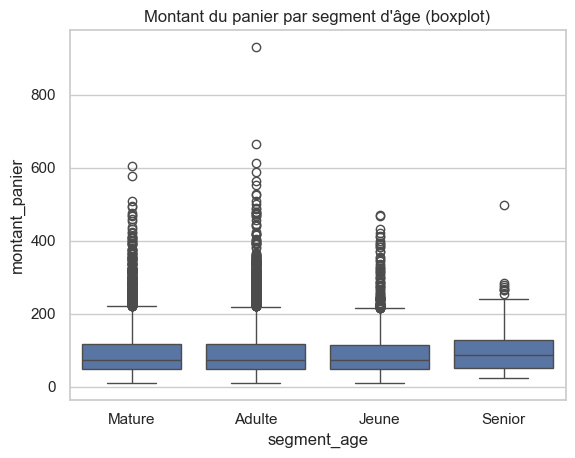

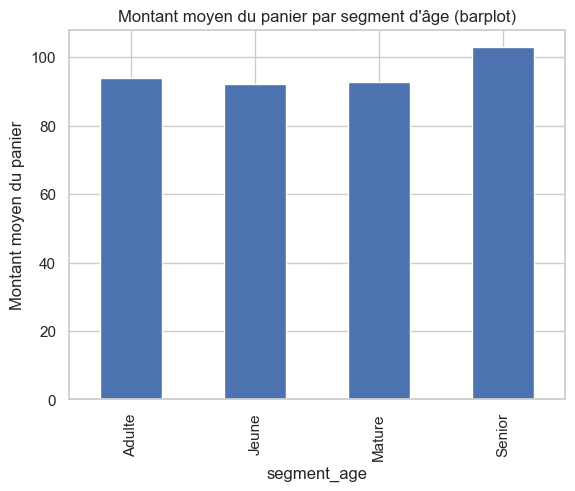

In [10]:

plt.figure()
if sns is not None:
    sns.boxplot(x=var_quali_multi, y=var_quanti_multi, data=df)
else:
    groups_multi = [g[var_quanti_multi].values for _, g in df.groupby(var_quali_multi)]
    labels_multi = df[var_quali_multi].unique()
    plt.boxplot(groups_multi, labels=labels_multi)
plt.title("Montant du panier par segment d'âge (boxplot)")
plt.show()

group_means = df.groupby(var_quali_multi)[var_quanti_multi].mean()
plt.figure()
group_means.plot(kind="bar")
plt.ylabel("Montant moyen du panier")
plt.title("Montant moyen du panier par segment d'âge (barplot)")
plt.show()



### 2.3.2 Vérification des hypothèses (normalité, variances)


In [11]:

groups_multi = [g[var_quanti_multi].dropna().values for _, g in df.groupby(var_quali_multi)]

for label, g in df.groupby(var_quali_multi):
    vals = g[var_quanti_multi].dropna()
    stat, p = shapiro(vals.sample(min(len(vals), 500), random_state=42))
    print(f"Shapiro pour {label} : stat={stat:.3f}, p={p:.3f}, n={len(vals)}")

stat_lev_anova, p_lev_anova = stats.levene(*groups_multi)
print(f"\nTest de Levene (ANOVA) : stat={stat_lev_anova:.3f}, p={p_lev_anova:.3f}")


Shapiro pour Adulte : stat=0.714, p=0.000, n=7608
Shapiro pour Jeune : stat=0.823, p=0.000, n=1676
Shapiro pour Mature : stat=0.821, p=0.000, n=5550
Shapiro pour Senior : stat=0.847, p=0.000, n=166

Test de Levene (ANOVA) : stat=1.364, p=0.252



### 2.3.3 ANOVA & Kruskal–Wallis


In [12]:

f_stat, f_p = stats.f_oneway(*groups_multi)
print("ANOVA à un facteur")
print(f"F = {f_stat:.3f}, p = {f_p:.3e}\n")

kw_stat, kw_p = stats.kruskal(*groups_multi)
print("Test de Kruskal–Wallis")
print(f"H = {kw_stat:.3f}, p = {kw_p:.3e}")


ANOVA à un facteur
F = 1.696, p = 1.656e-01

Test de Kruskal–Wallis
H = 5.098, p = 1.648e-01



###  Conclusion

- ANOVA significative → au moins un segment d'âge diffère des autres  
- Si les hypothèses d’ANOVA ne sont pas satisfaites → interpréter plutôt Kruskal–Wallis  
- Pour voir quels groupes diffèrent, utiliser des tests post-hoc (Tukey / Dunn) dans un niveau avancé.



#  QUALI ↔ QUALI (`sexe` ↔ `retour_produit`)



## 3.1 Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | `sexe`, `retour_produit` |
| Graphiques | countplot, heatmap, barplot empilé à 100 % |
| Tests | Chi² d'indépendance, Fisher (2x2), V de Cramér |
| Hypothèses Chi² | effectifs attendus pas trop petits, observations indépendantes |
| Hypothèses Fisher | table 2x2, effectifs faibles |


In [13]:

var_q1 = "sexe"
var_q2 = "retour_produit"

table = pd.crosstab(df[var_q1], df[var_q2])
table


retour_produit,Non,Oui
sexe,,
Femme,6722,757
Homme,6718,803


In [14]:

# Proportions par ligne (chaque ligne = 100 %)
table_prop = table.div(table.sum(axis=1), axis=0) * 100
table_prop


retour_produit,Non,Oui
sexe,,
Femme,89.878326,10.121674
Homme,89.323228,10.676772


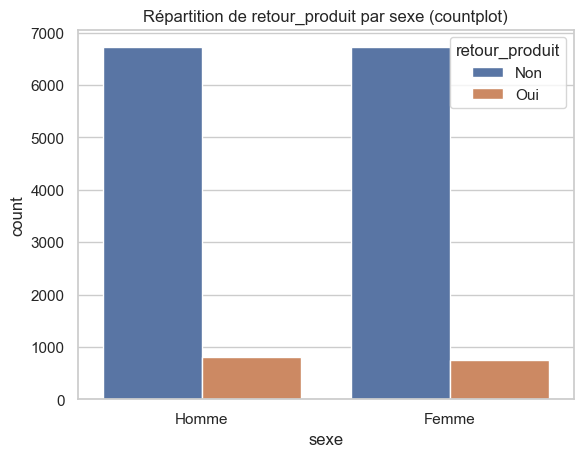

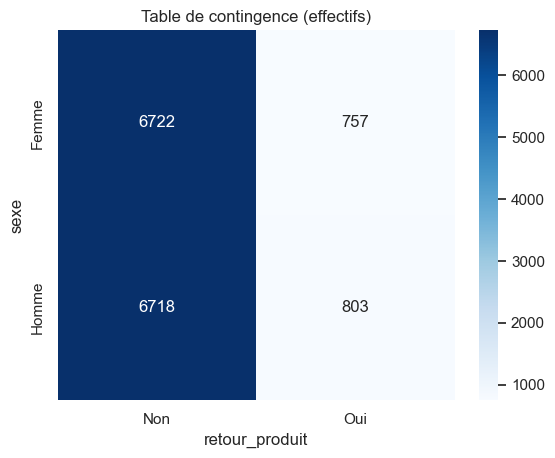

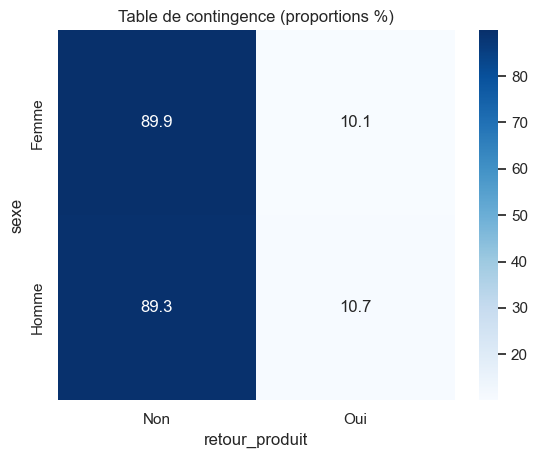

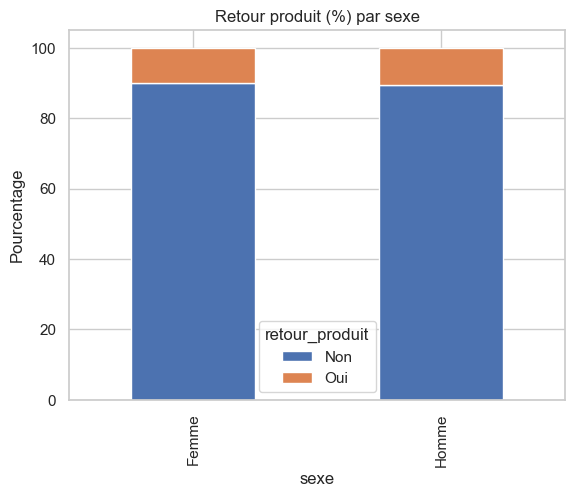

In [15]:

if sns is not None:
    plt.figure()
    sns.countplot(x=var_q1, hue=var_q2, data=df)
    plt.title("Répartition de retour_produit par sexe (countplot)")
    plt.show()

    plt.figure()
    sns.heatmap(table, annot=True, fmt="d", cmap="Blues")
    plt.title("Table de contingence (effectifs)")
    plt.ylabel(var_q1)
    plt.xlabel(var_q2)
    plt.show()

    plt.figure()
    sns.heatmap(table_prop, annot=True, fmt=".1f", cmap="Blues")
    plt.title("Table de contingence (proportions %)")
    plt.ylabel(var_q1)
    plt.xlabel(var_q2)
    plt.show()

table_prop.plot(kind="bar", stacked=True)
plt.ylabel("Pourcentage")
plt.title("Retour produit (%) par sexe")
plt.legend(title=var_q2)
plt.show()



##  Tests : Chi², Fisher, V de Cramér


In [16]:

chi2, p_chi2, dof, expected = stats.chi2_contingency(table)
print(f"Test du Chi² : chi2 = {chi2:.3f}, p = {p_chi2:.3e}, ddl = {dof}")


Test du Chi² : chi2 = 1.181, p = 2.771e-01, ddl = 1


In [17]:

from scipy.stats import fisher_exact

if table.shape == (2, 2):
    oddsratio, p_fisher = fisher_exact(table)
    print(f"Test exact de Fisher : odds ratio = {oddsratio:.3f}, p = {p_fisher:.3e}")
else:
    print("La table n'est pas 2x2 : Fisher exact non applicable directement.")


Test exact de Fisher : odds ratio = 1.061, p = 2.728e-01


In [18]:

# V de Cramér
n = table.to_numpy().sum()
phi2 = chi2 / n
r, k = table.shape
phi2_corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
r_corr = r - (r-1)**2/(n-1)
k_corr = k - (k-1)**2/(n-1)
cramers_v = np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))
print(f"V de Cramér : {cramers_v:.3f}")


V de Cramér : 0.003



### 3.3 Conclusion

- Si p(Chi²) < 0.05 → on rejette H0 : les variables sont associées.  
- V de Cramér mesure la **force** de l'association (proche de 0 → faible, proche de 1 → forte).  
- Toujours interpréter en regardant les proportions (% par sexe) et le contexte métier.




#  Récapitulatif général

1. Identifier le type de variables (quanti/quali).  
2. Choisir le couple **graphique + test** adapté.  
3. Vérifier les hypothèses (normalité, variances, effectifs).  
4. Regarder la **p-valeur** mais aussi la **taille de l'effet** (écarts de moyennes, corrélations, V de Cramér).  
5. Conclure dans un langage clair et compréhensible pour un non-statisticien.
